In [ ]:

!python -m pip install -U scikit-image


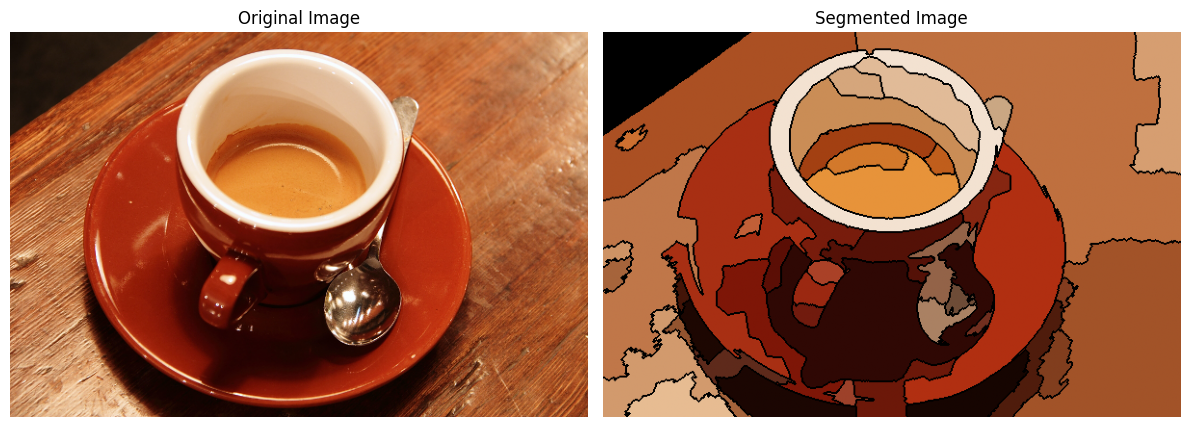

In [7]:
from skimage import data, segmentation, color
from skimage import graph
import numpy as np
import matplotlib.pyplot as plt


def _weight_mean_color(graph, src, dst, n):
    diff = graph.nodes[dst]['mean color'] - graph.nodes[n]['mean color']
    diff = np.linalg.norm(diff)
    return {'weight': diff}


def merge_mean_color(graph, src, dst):
    graph.nodes[dst]['total color'] += graph.nodes[src]['total color']
    graph.nodes[dst]['pixel count'] += graph.nodes[src]['pixel count']
    graph.nodes[dst]['mean color'] = (
        graph.nodes[dst]['total color'] / graph.nodes[dst]['pixel count']
    )


# Load the coffee image
img = data.coffee()

# Display the original image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Create a subplot with 1 row and 2 columns
ax[0].imshow(img)
ax[0].set_title("Original Image")
ax[0].axis('off')  # Turn off axis labels

# Perform SLIC segmentation
labels = segmentation.slic(img, compactness=30, n_segments=400, start_label=1)

# Build the Region Adjacency Graph (RAG)
g = graph.rag_mean_color(img, labels)

# Perform hierarchical merging
labels2 = graph.merge_hierarchical(
    labels,
    g,
    thresh=35,
    rag_copy=False,
    in_place_merge=True,
    merge_func=merge_mean_color,
    weight_func=_weight_mean_color,
)

# Convert the merged labels back to an RGB image
out = color.label2rgb(labels2, img, kind='avg', bg_label=0)
out = segmentation.mark_boundaries(out, labels2, (0, 0, 0))

# Display the segmented image
ax[1].imshow(out)
ax[1].set_title("Segmented Image")
ax[1].axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()